In [ ]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import v2
from torch.utils.data.dataloader import DataLoader
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt 

picture_size = (28, 28)
batch_size = 16
learning_rate = 0.01
momentum = 0.9
epochs = 10

classes_count = 10

In [ ]:
# preparing data

feature_transforms = v2.Compose([
    v2.Resize(picture_size),
    v2.ToImage(),
    v2.ToDtype(torch.float32),
    v2.Normalize((0.1307, ), (0.3081,))
])

dataset_train = MNIST('./resources', train=True, download=True, transform=feature_transforms)
dataset_test = MNIST('./resources', train=False, download=True, transform=feature_transforms)

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size)

In [ ]:
# lenet-5

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=400, out_features=120),
            nn.Sigmoid(),
            nn.Linear(in_features=120, out_features=84),
            nn.Sigmoid(),
            nn.Linear(in_features=84, out_features=10)
        )

        for module in self.net:
            if type(module) == nn.Linear or type(module) == nn.Conv2d:
                nn.init.xavier_uniform_(module.weight)

    def forward(self, X):
        return self.net(X)

In [ ]:
# train & test loop

train_losses = [1.5]
test_losses = [1.5]
accuracy = [0]

def train(model, loss_fn, optimizer, dataloader):
    model.train()
    total_loss = 0

    for i, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()

        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(dataloader))


def test(model, loss_fn, dataloader):
    model.eval()
    with torch.no_grad():
        full_loss = 0
        correct_predictions = 0

        for i, (X, y) in enumerate(dataloader):
            pred = model(X)
            loss = loss_fn(pred, y)
            full_loss += loss
            correct_predictions += torch.sum(torch.argmax(pred, dim=1) == y).item()

        test_losses.append(full_loss / len(dataloader))
        accuracy.append(correct_predictions / len(dataloader.dataset))
 

In [99]:
model = LeNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

for i in range(epochs):
    print(f'EPOCH {i + 1}')
    train(model, loss_fn, optimizer, dataloader_train)
    test(model, loss_fn, dataloader_test)
    print(f'Train loss: {train_losses[-1]}')
    print(f'Test loss: {test_losses[-1]}')
    print(f'Accuracy: {accuracy[-1]}')

EPOCH 1
Train loss: 1.0740067231913408
Test loss: 0.32414841651916504
Accuracy: 0.9018
EPOCH 2
Train loss: 0.25024789372036854
Test loss: 0.1596117466688156
Accuracy: 0.9505
EPOCH 3
Train loss: 0.14845691188853233
Test loss: 0.11077425628900528
Accuracy: 0.9663
EPOCH 4
Train loss: 0.11240484672064582
Test loss: 0.0888376384973526
Accuracy: 0.9723
EPOCH 5
Train loss: 0.09948807480608424
Test loss: 0.08173153549432755
Accuracy: 0.9723
EPOCH 6
Train loss: 0.08732424652224097
Test loss: 0.07696457207202911
Accuracy: 0.9748
EPOCH 7
Train loss: 0.07611938611737763
Test loss: 0.07083074748516083
Accuracy: 0.9772
EPOCH 8
Train loss: 0.06708311091891955
Test loss: 0.059075336903333664
Accuracy: 0.9801
EPOCH 9
Train loss: 0.06427283096190853
Test loss: 0.06059274822473526
Accuracy: 0.9801
EPOCH 10
Train loss: 0.0618212801894173
Test loss: 0.05619364604353905
Accuracy: 0.982


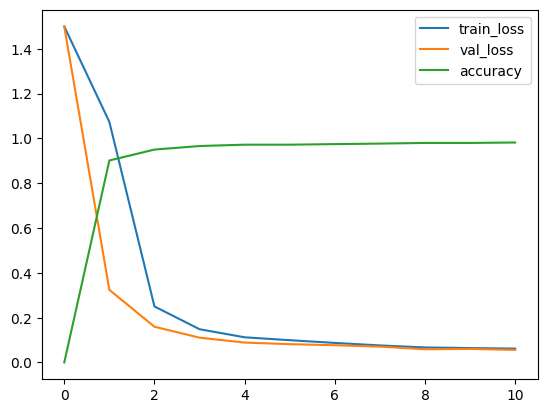

In [100]:
plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='val_loss')
plt.plot(accuracy, label='accuracy')
plt.legend()
plt.show()